# HW3 correction

## Exersice 16: Errors in these notes
Let $X$ be a Poisson random variable with mean $\mu$ representing the number of errors 
on a page of these notes.
Each error is independently a grammatical error with probability $p$ or a spelling error 
with probability $1-p$.
If $Y$ and $Z$ are random variables representing the number of grammatical  and spelling 
errors on a page of this book, prove that $Y$ and $Z$ are Poisson random variables with 
means $\mu p$ and $\mu(1-p)$, respectively.
Also prove that $Y$ and $Z$ are independent.

**python**: Generate $X,Y,Z$ according to the description above with $\mu = 10$ and $p = 0.3$. Generate $10^4$ instances and verify that what you've proven holds. 

### Solution: 
We know 
$$
    \Pr[X = j] = \frac{e^{-\mu} \mu^j }{j!}.
$$
Let's look at 
$$
    \Pr[Y=k] = \sum_{j=k}^\infty \Pr[Y=k|X=j] \Pr[X=j].
$$
From the description we can gather that $Y|X=j$ is bernoulli distributed with parameters $p,j$. Hence
$$
    \Pr[Y=k] = \sum_{j=k}^\infty {j \choose k} p^k (1-p)^{j-k} \frac{e^{-\mu} \mu^j }{j!} = 
    $$
$$
    = \sum_{j=k}^\infty \frac{j!}{(j-k)!k!} p^k (1-p)^{j-k} \frac{e^{-\mu} \mu^j }{j!} = ... = \frac{e^{-\mu p} (\mu p)^k }{k!} \sum_{l=0}^\infty \frac{e^{-\mu (1-p)}  (\mu(1-p))^l }{l!}.
$$
We recognise the last part as the sum over a PMF of a poisson distributed variable with parameter $ \mu (1-p) $, hence it is equal to 1.
$$
    \Rightarrow \Pr[Y=k] = \frac{e^{-\mu p} (\mu p)^k }{k!}.
$$
The exact same argument can be made for $Z$ by changing all $p$ to $1-p$. This is the Poisson PMF, and hence $Y,Z$ are both poisson distributed with means $\mu p$ and $\mu(1-p)$, respectively. Next we check for independence 
$$
    \Pr[Y=k,Z=l] = \sum_{j=0}^\infty \Pr[Y=k,Z=l|X=j] \Pr[X=j].
$$
We note that for $\Pr[Y=k,Z=l|X=j] > 0$ we must have $j = k+l$ and thus get
$$
    \Pr[Y=k,Z=l] = \Pr[Y=k,Z=l|X=k+l] \Pr[X=k+l] = 
$$
$$
    = {k+l \choose k} p^k (1-p)^l \frac{e^{-\mu} \mu^{l+k} }{(l+k)!} = ... =  \frac{e^{-\mu p} (\mu p)^k }{k!}  \frac{e^{-\mu (1-p)}  (\mu(1-p))^l }{l!}
$$
$$
    \Rightarrow \Pr[Y=k,Z=l] = \Pr[Y=k] \Pr[Z=l],
$$
and thus they are independent. 


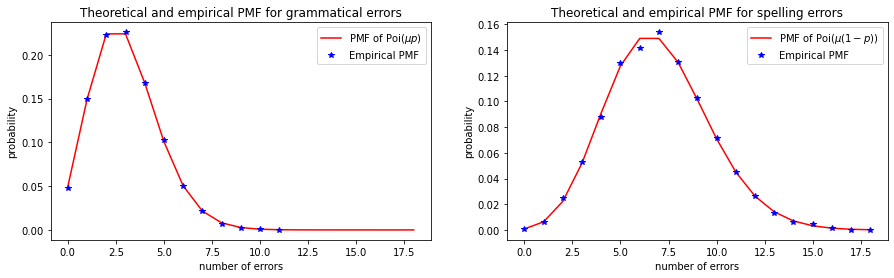

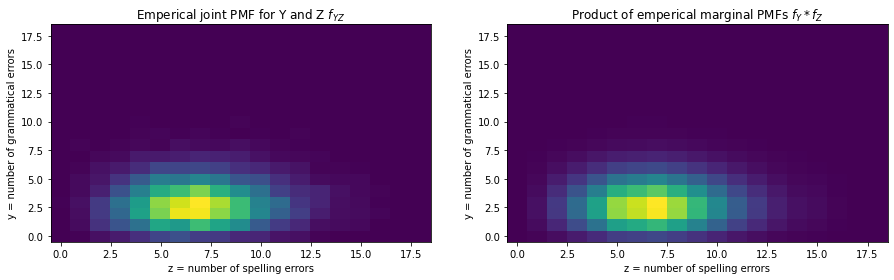

In [57]:
import numpy as np
import matplotlib.pyplot as plt

from collections import Counter
from scipy.stats import poisson
import scipy.special 

n = int(1e4)
mu = 10
p = 0.3 

X = np.random.poisson(lam=mu,size=n)
Y = np.zeros(X.size)
Z = np.zeros(X.size)

for i,x in enumerate(X):
    error_type = np.random.choice(['grammatical','spelling'],size=x,p=[p,1-p])
    # Two different ways to do the same thing:
    Y[i] = np.count_nonzero(error_type == 'grammatical');
    Z[i] = list(error_type).count('spelling')

k = np.arange( np.amax( np.concatenate((Y,Z)) ) +1)

# Approx PMFs
counter = Counter(Y)
k_Y_apx = list(counter.keys())
f_Y_apx = np.array(list(counter.values()))/n

counter = Counter(Z)
k_Z_apx = list(counter.keys())
f_Z_apx = np.array(list(counter.values()))/n

f_Y = np.exp(-mu*p)*(mu*p)**k/scipy.special.factorial(k.astype(int))
f_Z = poisson.pmf(k, mu*(1-p))

# Approx joint PMF
f_YZ_apx = np.zeros((len(k),len(k)))
for i in range(n):
    y = Y[i]
    z = Z[i]
    f_YZ_apx[int(y),int(z)] += 1/n

f_YxZ_apx = np.zeros((len(k),len(k)))
# Have to do enumerate below since the arrays are not ordered. 
for i,j in enumerate(k_Y_apx):
    for m,l in enumerate(k_Z_apx):
        f_YxZ_apx[int(j),int(l)] = f_Y_apx[i]*f_Z_apx[m]

fig, axs = plt.subplots(1, 2)

axs[0].plot(k,f_Y,'r')
axs[0].plot(k_Y_apx,f_Y_apx,'b*')
axs[0].set_xlabel('number of errors')
axs[0].set_ylabel('probability')
axs[0].legend(['PMF of Poi($\mu p$)','Empirical PMF'])
axs[0].set_title('Theoretical and empirical PMF for grammatical errors')

axs[1].plot(k,f_Z,'r')
axs[1].plot(k_Z_apx,f_Z_apx,'b*')
axs[1].set_xlabel('number of errors')
axs[1].set_ylabel('probability')
axs[1].legend(['PMF of Poi($\mu (1-p)$)','Empirical PMF'])
axs[1].set_title('Theoretical and empirical PMF for spelling errors')

fig.set_figwidth(15)

plt.show()

fig, axs = plt.subplots(1, 2)

J, L = np.meshgrid(k,k)

axs[0].pcolormesh(J,L,f_YZ_apx,shading='auto')
axs[0].set_ylabel('y = number of grammatical errors')
axs[0].set_xlabel('z = number of spelling errors')
axs[0].set_title('Emperical joint PMF for Y and Z $f_{YZ}$')

axs[1].pcolormesh(J,L,f_YxZ_apx,shading='auto')
axs[1].set_ylabel('y = number of grammatical errors')
axs[1].set_xlabel('z = number of spelling errors')
axs[1].set_title('Product of emperical marginal PMFs $f_Y*f_Z$')

fig.set_figwidth(15)
plt.show()


We see from the plots above that

1) The theortical and empirical PMFs for Y and Z match very well $\Rightarrow$ Y,Z seem to be Poisson distributed with the calculated parameter
2) The Empirical joint PMF is very close to product of the PMFs $\Rightarrow$ Y,Z seem to be independent. 

## Exersice 20: Game board
A circular game board has $K$ spaces numbered $0,1,\dots K-1$.
Starting at space $0$ at time $n=0$, a player rolls a fair six-sided die to move a token.
Hence, given the current token position $X_{n}$, the next token position is $X_{n+1} = (X_{n} +R_{n}) \mod K$    where $R_{n}$ is the result of the player's $n$th roll.
Find the stationary probability vector.

**python**: Fix $K > 20$ and initialise $2K$ different state probability vectors $\mathbf{p}_{i}(0), \, i \in \{0,\cdots, 2K - 1\}$. Calculate $\mathbf{p}_{i}(10^3), \, i \in \{0,\cdots, 2K - 1\}$ and see if it is close to the stationary probability vector. Plot your results. 

### Solution:

Transition probability from space $i$ to $j$ is 
$$
    P_{ij} = \frac{1}{6}, \quad j \in \{ \mod(i+n,K), n \in \{1,2,\cdots,6\} \}
$$
We want to find the stationary probability vector. We might want to use the following:

>#### Thm
(Reformulated) *For an irreducible, aperiodic, finite chain we have $\exists ! \pi$:*
$$
    \pi P = \pi, \quad \sum_k \pi_k = 1, \pi_k \geq 0 \forall k
$$
*where*
$$
    k \in \{0,1,\cdots,K-1\}.
$$

Hence we would like to know:
* Is the chain irreducible? Yes it is. All states are in one communicating class. To get from any one state to any other state, we can, e.g., always roll only 1's and we will get there eventually. 
* Is the chain aperiodic? Yes it is. Consider a state $i$. The earliest we can return is after $\text{ceil}(6/K)$ rolls. After this however there is generally some possiblity of return on the next, or next next state etc. 
* Is it finite? Yes it is. 

Then we can apply this theorem! The theorem tells us that there is a uniques solution $\pi$. What could it be? From the structure of the problem there is nothing telling us that one state should be favoured. Hence a good guess is that all states have equal probability:
$$
    \pi_k = \frac{1}{K}. 
$$
We can verify this:
$$
    \pi P = \frac{1}{K} \left[ 1, 1, \cdots, 1 \right] \frac{1}{6} 
    \begin{bmatrix}
        0 & 1 & 1 & 1 & 1 & 1 & 1 & 0 & 0 & \cdots & 0 \\
        0 & 0 & 1 & 1 & 1 & 1 & 1 & 1 & 0 & \cdots & 0 \\
        \vdots & \vdots & \ddots & \ddots & \ddots & \ddots & \ddots & \ddots & \ddots & \cdots & 0 \\
        1 & 0 & 0 & 0 & 0 & 0 & \cdots & 1 & 1 & 1 & 1 \\
        1 & 1 & 0 & 0 & 0 & 0 & \cdots & 1 & 1 & 1 & 1 \\
        1 & 1 & 1 & 0 & 0 & 0 & \cdots & 0 & 1 & 1 & 1 \\
        1 & 1 & 1 & 1 & 0 & 0 & \cdots & 0 & 0 & 1 & 1 \\
        1 & 1 & 1 & 1 & 1 & 0 & \cdots & 0 & 0 & 0 & 1 \\
        1 & 1 & 1 & 1 & 1 & 1 & \cdots & 0 & 0 & 0 & 0 \\
    \end{bmatrix}
$$
$$
    = \frac{1}{6K} \left[ 6, 6, \cdots, 6 \right] = \frac{1}{K} \left[ 1, 1, \cdots, 1 \right] = \pi.
$$
Above I assumed that $K>6$. This is ok, since we can expand any board with $K\leq6$ to include the number of times we have passed $k=0$ modulo some number. Then we can still show that this holds. 

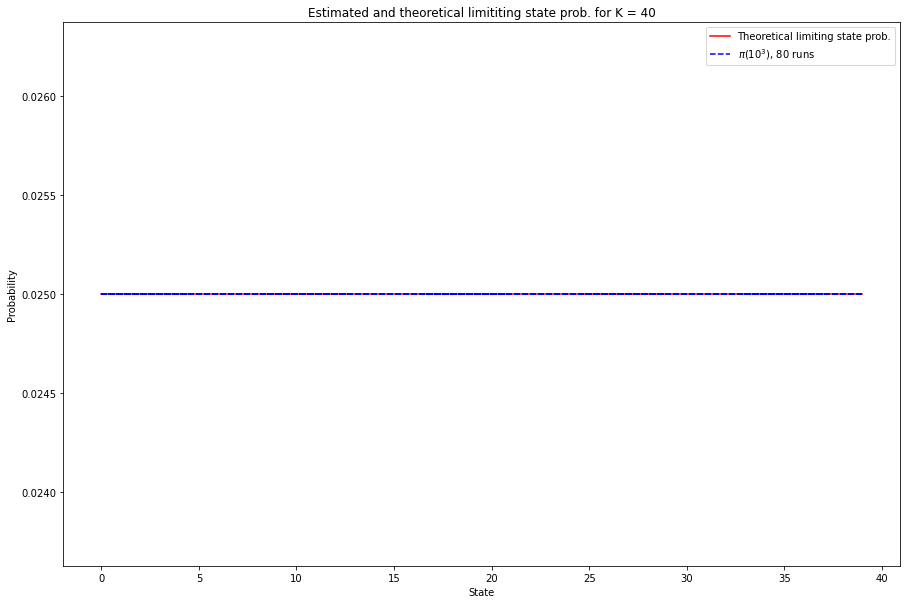

In [4]:
import numpy as np
import matplotlib.pyplot as plt

K = 40
N = int(1e3)

# Generate random p_0
p_0 = np.random.random(size=(2*K,K))
p_0 = np.transpose(np.transpose(p_0)/np.sum(p_0,axis=1))

# Make transistion matrix P
P = np.zeros(shape=(K,K))

for i in range(K):
    for j in np.mod(i + np.arange(1,7),K):
        P[i,j] += 1./6.       

# Generate pi_N
p_N = np.zeros(shape=p_0.shape)
p_N = p_0

for _ in range(N+1):
    p_N = p_N @ P
    # Some issues with float precission, solve by re norming
    p_N = np.transpose(np.transpose(p_N)/np.sum(p_N,axis=1))
    
fig = plt.figure(figsize = [15,10])
plt.plot(np.ones(K)/K,'r')
plt.plot(np.transpose(p_N),'b--')
plt.xlabel('State')
plt.ylabel('Probability')
plt.legend(['Theoretical limiting state prob.','$\pi(10^3)$, {} runs'.format(2*K)])
plt.title('Estimated and theoretical limititing state prob. for K = {}'.format(K))

plt.show()